Q1

To perform a matrix multiplication between a (n, k) and (k, m) matrix, we need to perform k multiplications for each element in the resulting matrix. We know that the number of elements in the resulting matrix are n * m. Thus, we need to perform a total of n * k * m multiplications. 

Also, we need to perform (k-1) additions to sum the products and compute the elements of resulting matrix and there are total n * m elements, so a total of n * (k-1) * m additions need to be performed.

For example, if matrix A has dimensions (3, 4) and matrix B has dimensions (4, 2), then we need to perform 3 * 4 * 2 = 24 multiplications and 3 * 3 * 2 = 18 additions to compute the matrix multiplication of matrices A and B.

Q2

In [3]:
# Python code to multiply the two matrices of (n, k) and (l, m) dimensions using list of lists and numpy
import numpy as np

def myMatrixMultiplier(A, B):

    n = len(A)
    k = len(A[0])
    l = len(B)
    m = len(B[0])

    
    if k != l:
        print("Matrix dimensions are not compatible for matrix multiplication!")

    else :
        answer = [[0 for x in range(m)] for y in range(n)]

        for i in range(n):
            for j in range(m):
                for o in range(l):
                    answer[i][j] = answer[i][j] + (A[i][o] * B[o][j])

        return answer

def numpyMatrixMultiplier(C, D):

    ans = np.dot(C, D)
    return ans

In [37]:
# Python code to compare timing for both solutions
import random
import time
import numpy as np

total_time_list = 0.0
sq_total_time_list = 0.0
total_time_np = 0.0
sq_total_time_np = 0.0

for n in range(50):

    random.seed(0)
    matrix1 = [[random.randint(1, 10) for j in range(500)] for i in range(100)]
    random.seed(1)
    matrix2 = [[random.randint(1, 10) for j in range(250)] for i in range(500)]

    start_time = time.time()
    result_list = myMatrixMultiplier(matrix1, matrix2)
    total_time_list = total_time_list + time.time() - start_time
    sq_total_time_list = sq_total_time_list + (time.time() - start_time)**2

    start_time = time.time()
    result_np = numpyMatrixMultiplier(matrix1, matrix2)
    total_time_np = total_time_np + time.time() - start_time
    sq_total_time_np = sq_total_time_np + (time.time() - start_time)**2

print(f"Average time for list of lists method: {total_time_list/50} seconds")
print(f"Standard Deviation in time for list of lists method: {((sq_total_time_list/50) - ((total_time_list/50)**2))**(1/2)} seconds")
print(f"Average time for numpy method: {total_time_np/50} seconds")
print(f"Standard Deviation in time for numpy method: {((sq_total_time_np/50) - ((total_time_np/50)**2))**(1/2)} seconds")



Average time for list of lists method: 4.224885597229004 seconds
Standard Deviation in time for list of lists method: 1.3385850008795095 seconds
Average time for numpy method: 0.046469297409057614 seconds
Standard Deviation in time for numpy method: 0.01913462809747541 seconds


Clearly, the matrix multiplication performed using numpy is faster when dimension of the matrices is large as it uses vectorization to evaluate the result while the list of lists method has 3 nested for loops which takes significantly more time to evaluate the result.

Q3

Using the method suggested in the question, the time complexity of finding the median of the array will be O($n^2$) as we need to find the $(n//2 + 1)^{th}$ highest number in the array, in order to find the median if the size of the array is odd, which will take $n/2$ passes of the array. If the array size is even, we need to find the $(n//2)^{th}$ and $(n//2 + 1)^{th}$ highest number in the array which will also be of time complexity O($n^2$).

A better method would be to sort the array and find the middle element of the sorted array if the array size is odd or find the $(n//2)^{th}$ and $(n//2 + 1)^{th}$ element of the sorted array if the array size is even. This method will be of time complexity O($n\times log(n)$).

In [38]:
import numpy as np

# Computing median using suggested method in the question
def computeMedian(arr):

    arr1 = arr.copy()
    n = len(arr1)
    m = n//2

    if n%2 != 0:
        for i in range(m+1):
            p = len(arr1)
            x = arr1[0]
            for j in range(p):
                if arr1[j] > x:
                    x = arr1[j]
            arr1.remove(x)
        return x
    else :
        for i in range(m):
            p = len(arr1)
            x = arr1[0]
            for j in range(p):
                if arr1[j] > x:
                    x = arr1[j]
            arr1.remove(x)
        a = x
        p = len(arr1)
        y = arr1[0]
        for j in range(p):
            if arr1[j] > y:
                y = arr1[j]
        return (a+y)/2


# Computing median using better method than the one suggested in the question
def betterComputeMedian(arr):

    arr1 = sorted(arr)
    n = len(arr1)

    if n%2 == 0:
        return (arr1[(n//2)-1]+arr1[n//2])/2
    else:
        return arr1[n//2]

# Computing median using numpy
def numpyComputeMedian(arr):

    return np.median(arr)


In [39]:
# Python code to compare timing
import random
import time
import numpy as np

total_time_median = 0.0
sq_total_time_median = 0.0
total_time_better = 0.0
sq_total_time_better = 0.0
total_time_np = 0.0
sq_total_time_np = 0.0

for n in range(1000):

    random.seed(0)
    list = [random.randint(1, 100) for j in range(1000)]

    start_time = time.time()
    result_median = computeMedian(list)
    total_time_median = total_time_median + time.time() - start_time
    sq_total_time_median = sq_total_time_median + (time.time() - start_time)**2

    start_time = time.time()
    result_better = betterComputeMedian(list)
    total_time_better = total_time_better + time.time() - start_time
    sq_total_time_better = sq_total_time_better + (time.time() - start_time)**2

    start_time = time.time()
    result_np = numpyComputeMedian(list)
    total_time_np = total_time_np + time.time() - start_time
    sq_total_time_np = sq_total_time_np + (time.time() - start_time)**2

print(f"Average time for suggested method: {total_time_median/1000} seconds")
print(f"Standard Deviation in time for suggested method: {((sq_total_time_median/1000) - ((total_time_median/1000)**2))**(1/2)} seconds")
print(f"Average time for better method: {total_time_better/1000} seconds")
print(f"Standard Deviation in time for better method: {((sq_total_time_better/1000) - ((total_time_better/1000)**2))**(1/2)} seconds")
print(f"Average time for numpy method: {total_time_np/1000} seconds")
print(f"Standard Deviation in time for numpy method: {((sq_total_time_np/1000) - ((total_time_np/1000)**2))**(1/2)} seconds")

Average time for suggested method: 0.050171767234802246 seconds
Standard Deviation in time for suggested method: 0.016836019564849293 seconds
Average time for better method: 0.00025443363189697266 seconds
Standard Deviation in time for better method: 0.0011057759209264534 seconds
Average time for numpy method: 0.00040832972526550295 seconds
Standard Deviation in time for numpy method: 0.001415031835992471 seconds


We can see that the time for better method is less than the method using numpy which in turn is lesser than the method in the question.

Q4

We know that the gradient of any function f(x,y) with respect to (x, y) is ($\frac {\partial f(x,y)} {\partial x}$, $\frac {\partial f(x,y)} {\partial y}$)

Thus, the gradient of the given function with respect to x is: $2xy+y^3cos(x)$

Thus, the gradient of the given function with respect to y is: $x^2+3y^2sin(x)$ 

Q5

In [ ]:
# Computing the gradient of f with respect to x and y using JAX 
# to confirm the gradient evaluated by our method matches the analytical solution corresponding to a few random values of x and y
import jax
import jax.numpy as jnp
import numpy as np

def f(X):
  x = X[0]
  y = X[1]
  return (x**2)*y + ((y**3)*jnp.sin(x))

def gradient_f(x, y):
  return 2*x*y + ((y**3)*np.cos(x)), x**2 + (3*(y**2)*np.sin(x))

for i in range(10):
  x = np.random.rand()
  y = np.random.rand()

  # Computimg the gradient of f(x, y) numerically using JAX
  grad_f = jax.grad(f)
  jax_gradient = grad_f(jnp.array([x, y]))

  # Computimg the gradient of f(x, y) analytically
  analytic_gradient = gradient_f(x, y)

  print("JAX Gradient:", jax_gradient)
  print("Explicit Gradient:", analytic_gradient)

Q6

In [5]:
# Computing the gradient of f with respect to x and y using SymPy
import sympy

x, y = sympy.symbols('x y')
f = (x**2)*y + ((y**3)*sympy.sin(x))

sympy.diff(f, x), sympy.diff(f, y)


(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

Q7

In [6]:
# Creating nested dictionary to represent hierarchical information
Dictionary = { 
    2022: {
        'Branch 1': {
            'Roll Number':1, 
            'Name':'N', 
            'Marks': {
                'Maths':100, 'English':70
            }
        },
        'Branch 2':{}
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    },
}

print(Dictionary)
    

{2022: {'Branch 1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


Q8

In [7]:

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, branch, students):
        self.branch = branch
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

database = [
    Year(2022, [Branch('Branch 1', [Student(1, "N", {"Maths": 100,"English": 70})]), Branch('Branch 2', [])]),
    Year(2023, [Branch('Branch 1', []), Branch('Branch 2', [])]),
    Year(2024, [Branch('Branch 1', []), Branch('Branch 2', [])]),
    Year(2025, [Branch('Branch 1', []), Branch('Branch 2', [])])
]

# print(database[0].branches[0].students[0].name)



Q9

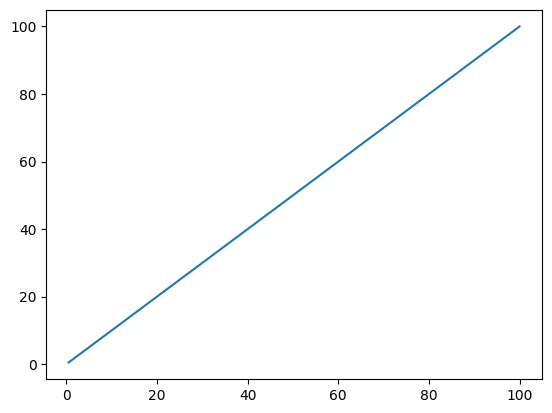

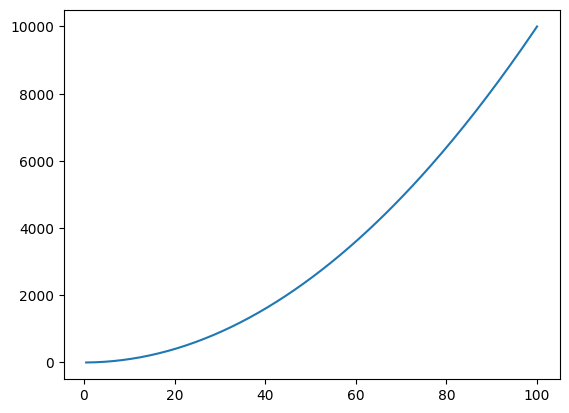

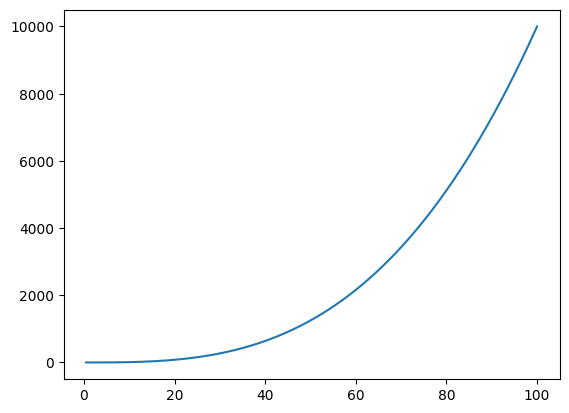

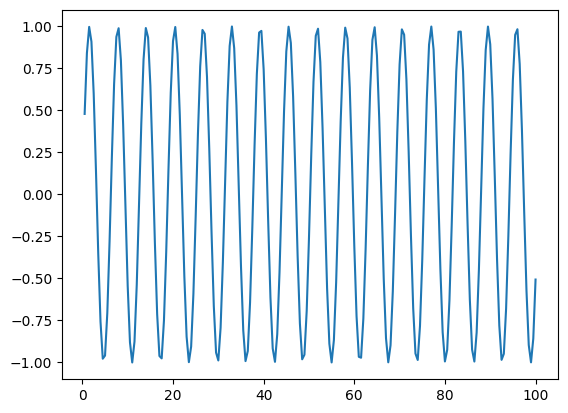

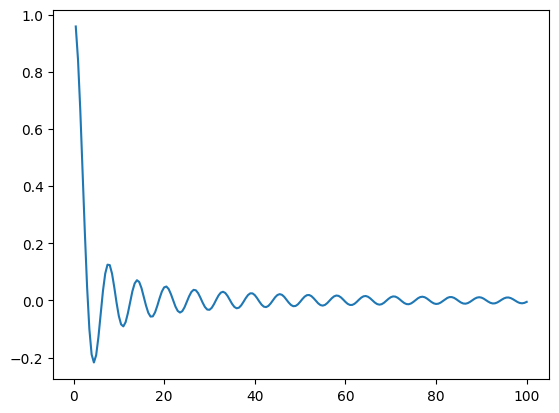

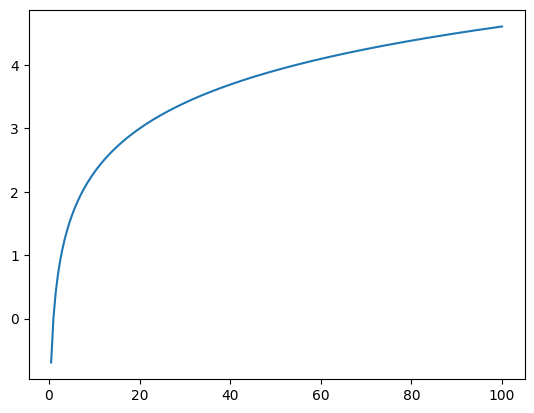

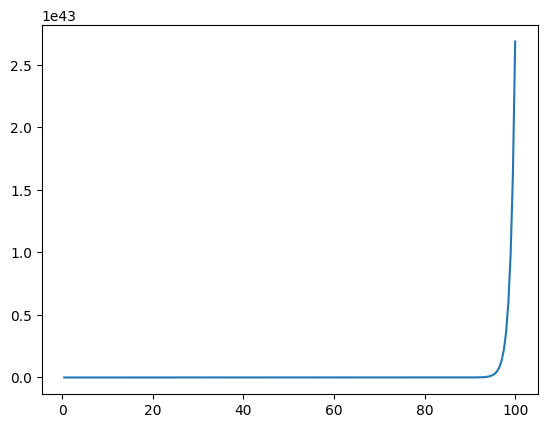

In [8]:
# Code for plotting the given functions using matplotlib

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

#1
y = x
plt.plot(x, y)
plt.show()

#2
y = x**2
plt.plot(x, y)
plt.show()

#3
y = (x**3)/100
plt.plot(x, y)
plt.show()

#4
y = np.sin(x)
plt.plot(x, y)
plt.show()

#5
y = (np.sin(x))/x
plt.plot(x, y)
plt.show()

#6
y = np.log(x)
plt.plot(x, y)
plt.show()

#7
y = np.exp(x)
plt.plot(x, y)
plt.show()

Q10

In [ ]:
import numpy as np
import pandas as pd

mat = np.random.uniform(1, 2, size = (20, 5))

dataframe = pd.DataFrame(mat, columns = ["a", "b", "c", "d", "e"])

highest_std_dev = dataframe.std(axis = 0).idxmax()
lowest_mean = dataframe.mean(axis = 1).idxmin()

print("Col with highest standard deviation: ", highest_std_dev)
print("Row with lowest mean: ", lowest_mean)

Q11

In [ ]:
dataframe["f"] = dataframe["a"] + dataframe["b"] + dataframe["c"] + dataframe["d"] + dataframe["e"]
dataframe["g"] = " "

lessthan = 0.0
sq_lessthan = 0.0
greaterthan = 0.0
sq_greaterthan = 0.0
count1 = 0
count2 = 0

for i in range(20):
    if dataframe["f"][i] < 8:
        dataframe["g"][i] = "LT8"
        lessthan = lessthan + dataframe["f"][i]
        sq_lessthan = sq_lessthan + (dataframe["f"][i])**2
        count1 = count1 + 1
    else :
        dataframe["g"][i] = "GT8"
        greaterthan = greaterthan + dataframe["f"][i]
        sq_greaterthan = sq_greaterthan + (dataframe["f"][i])**2
        count2 = count2 + 1

std_lessthan = ((sq_lessthan/count1) - ((lessthan/count1)**2))**(1/2)
std_greaterthan = ((sq_greaterthan/count2) - ((greaterthan/count2)**2))**(1/2)

print(f"Standard Deviation for LT8: {std_lessthan}")
print(f"Standard Deviation for GT8: {std_greaterthan}")

Q12

In [2]:
import numpy as np

test = np.random.randint(10, size = (3, 4))

# Adding a scalar to an numpy array showing that it broadcasts the scalar and computes the result
result = test + 3

print(test)
print(result)  

[[0 9 8 2]
 [9 4 2 4]
 [8 9 8 8]]
[[ 3 12 11  5]
 [12  7  5  7]
 [11 12 11 11]]


Q13

In [1]:
import numpy as np

# Function to compute argmin of a numpy array
def computeargmin(arr):
    
    arr1 = arr.copy()
    min = arr1[0]

    for i in range(len(arr1)):
        if arr1[i] < min:
            min = arr1[i]
            idx = i

    return idx

test = np.random.randint(100, size = (100,))
print(computeargmin(test))
print(np.argmin(test))

66
66
